<a href="https://colab.research.google.com/github/swatchai/Binder_project/blob/master/install_run_geopandas_folium_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Status: OK for geopandas, fiona, folium

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 41.0 MB/s 
     |████████████████████████████████| 16.7 MB 492 kB/s 


```POINT (30 10)
LINESTRING (30 10, 10 30, 40 40)
POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))
POLYGON ((35 10, 45 45, 15 40, 10 20, 35 10)),
(20 30, 35 35, 30 20, 20 30))
MULTIPOINT ((10 40), (40 30), (20 20), (30 10))
MULTIPOINT (10 40, 40 30, 20 20, 30 10)
MULTILINESTRING ((10 10, 20 20, 10 40),
(40 40, 30 30, 40 20, 30 10))
MULTIPOLYGON (((30 20, 45 40, 10 40, 30 20)),
((15 5, 40 10, 10 20, 5 10, 15 5)))
MULTIPOLYGON (((40 40, 20 45, 45 30, 40 40)),
((20 35, 10 30, 10 10, 30 5, 45 20, 20 35),
(30 20, 20 15, 20 25, 30 20)))
GEOMETRYCOLLECTION(POINT(4 6), LINESTRING(4 6,7 10), POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10)))
```




```
# This is formatted as code
```



In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point, Polygon, LineString
from shapely.wkt import loads

In [ ]:
# Create dataframe having 1 row of polygon wkt data
d = {'poly_id':[1,2], 'wkt':['POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))', \
                             'POLYGON ((35 10, 45 45, 15 40, 10 20, 35 10))', \
                            ]}
df = pd.DataFrame( data=d )

In [ ]:
df

,poly_id,wkt
0,1,"POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))"
1,2,"POLYGON ((35 10, 45 45, 15 40, 10 20, 35 10))"


In [ ]:
# Need: from shapely.geometry import Point, Polygon
# Note: if pgon is shapely geom, dont use `loads()`
geometry = [loads(pgon) for pgon in df.wkt]
polygon_df = gpd.GeoDataFrame(df, \
                   crs='epsg:4326', \
                   geometry=geometry)

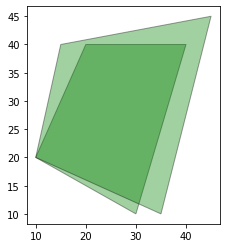

In [ ]:
ax1 = polygon_df.plot(ec='black', color='green', alpha=0.37)

Folium

In [ ]:
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as mpl
import folium
import pandas as pd
from io import StringIO  #if use string geojson on this ipynb

In [ ]:
# data src: https://github.com/mledoze/countries/tree/master/data
# how to get them directly thru the web?

# This is a long string in 1 line
iran_json_text = """{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"cca2":"ir"},"geometry":{"type":"MultiPolygon","coordinates":[[[[54.034439,26.484718],[54.028046,26.4836],[53.97887,26.484718],[53.9711,26.48555],[53.946381,26.492218],[53.929993,26.498882],[53.920547,26.50444],[53.912766,26.51139],[53.903877,26.529999],[53.9036,26.53611],[53.910545,26.543888],[53.927216,26.556385],[53.932213,26.558887],[53.943878,26.561386],[53.949432,26.561665],[53.966103,26.56028],[54.018883,26.554165],[54.02388,26.551662],[54.027489,26.54805],[54.030273,26.54361],[54.048882,26.513054],[54.051384,26.50889],[54.051102,26.49721],[54.04416,26.48944],[54.034439,26.484718]]],[[[53.318054,26.797775],[53.28138,26.785275],[53.26694,26.786942],[53.234161,26.794163],[53.203323,26.802498],[53.177216,26.814999],[53.16499,26.824718],[53.154434,26.835831],[53.151657,26.840275],[53.151657,26.846386],[53.15416,26.85111],[53.163322,26.856663],[53.171104,26.856106],[53.194435,26.85083],[53.30499,26.823608],[53.318054,26.797775]]],[[[56.346657,26.82222],[56.340271,26.821663],[56.332771,26.82222],[56.32666,26.824165],[56.32249,26.827496],[56.317215,26.836109],[56.318054,26.843052],[56.325272,26.85833],[56.333878,26.871941],[56.34388,26.884163],[56.35332,26.889439],[56.393883,26.892494],[56.400826,26.89111],[56.4086,26.885551],[56.411102,26.881107],[56.411102,26.874996],[56.409714,26.868607],[56.405266,26.858051],[56.398048,26.850552],[56.371376,26.833607],[56.346657,26.82222]]],[[[55.734993,26.838051],[55.731659,26.797497],[55.721375,26.798885],[55.703747,26.812357],[55.66944,26.790276],[55.658043,26.785831],[55.647774,26.784443],[55.637497,26.785275],[55.632767,26.79472],[55.62638,26.833054],[55.636383,26.859997],[55.640274,26.86888],[55.688599,26.929161],[55.696655,26.93083],[55.713326,26.903606],[55.717209,26.892773],[55.734993,26.838051]]],[[[56.24527,26.927494],[56.1586,26.868607],[56.153046,26.85833],[56.146942,26.850273],[56.133049,26.834995],[56.118324,26.819717],[56.06055,26.771664],[55.987213,26.727772],[55.91082,26.709438],[55.81916,26.70916],[55.696098,26.688885],[55.684715,26.685551],[55.674995,26.68138],[55.55888,26.622498],[55.327492,26.546108],[55.304993,26.540276],[55.29583,26.54222],[55.283607,26.558609],[55.274994,26.65083],[55.28249,26.658051],[55.294998,26.655273],[55.315544,26.644718],[55.328606,26.641941],[55.360275,26.642773],[55.5186,26.698883],[55.599434,26.732494],[55.636658,26.753609],[55.646385,26.75861],[55.6661,26.767776],[55.675827,26.772221],[55.71138,26.780552],[55.740547,26.77861],[55.751106,26.782776],[55.769989,26.792774],[55.784164,26.841106],[55.7686,26.881107],[55.763054,26.892773],[55.75222,26.903885],[55.742493,26.912216],[55.736382,26.92194],[55.73777,26.93083],[55.75222,26.951939],[55.756943,26.952217],[55.781105,26.948605],[55.842216,26.92194],[55.853359,26.91555],[55.956657,26.929996],[55.999435,26.9575],[56.10055,26.985271],[56.155548,26.998604],[56.22054,27.00055],[56.232208,26.996105],[56.273048,26.975826],[56.282768,26.970272],[56.290276,26.963329],[56.28833,26.94997],[56.24527,26.927494]]],[[[56.470825,27.037777],[56.464439,27.03722],[56.458328,27.037777],[56.452217,27.039719],[56.436935,27.047497],[56.433601,27.051109],[56.43277,27.056942],[56.432495,27.075554],[56.43333,27.082497],[56.434715,27.086941],[56.464439,27.10722],[56.469986,27.108608],[56.50388,27.086662],[56.509163,27.071663],[56.50833,27.06611],[56.505554,27.061386],[56.487495,27.042496],[56.470825,27.037777]]],[[[50.32888,29.20805],[50.322495,29.20694],[50.318604,29.210552],[50.315826,29.214718],[50.296104,29.251663],[50.289436,29.272774],[50.291382,29.278053],[50.296944,29.28],[50.303322,29.279442],[50.332771,29.271385],[50.338326,29.268887],[50.339432,29.263332],[50.332771,29.218884],[50.331383,29.212772],[50.32888,29.20805]]],[[[45.004433,39.416382],[45.063042,39.373047],[45.115822,39.312202],[45.130547,39.28555],[45.14137,39.253609],[45.14222,39.24054],[45.139992,39.221657],[45.14193,39.217484],[45.1461,39.214149],[45.22581,39.19498],[45.267769,39.186646],[45.274712,39.187759],[45.284431,39.193871],[45.296097,39.198601],[45.30304,39.199715],[45.30999,39.19832],[45.342209,39.168877],[45.348877,39.160538],[45.421097,39.06082],[45.42499,39.025826],[45.423882,39.019707],[45.427528,39.008324],[45.439423,38.998047],[45.477264,38.984962],[45.518593,38.970543],[45.538605,38.965546],[45.607491,38.951378],[45.8411,38.903603],[45.950829,38.887215],[46.074715,38.871933],[46.178246,38.84115],[46.195534,38.844147],[46.239716,38.86416],[46.25027,38.869431],[46.26361,38.879433],[46.273598,38.885262],[46.294716,38.895821],[46.347481,38.90942],[46.354706,38.91054],[46.376381,38.906937],[46.451935,38.889992],[46.51639,38.878036],[46.540375,38.875587],[46.572495,38.915825],[46.652206,38.97693],[46.738319,39.039429],[46.745537,39.047493],[46.74749,39.052773],[46.750542,39.064438],[46.751656,39.075829],[46.753609,39.081383],[46.765266,39.093323],[46.838326,39.15527],[46.848328,39.16109],[46.854439,39.163048],[46.874702,39.167496],[46.89666,39.168877],[46.90554,39.168877],[46.913315,39.16805],[46.919434,39.16582],[46.93998,39.154427],[46.948868,39.154427],[46.961372,39.158318],[47.025551,39.189423],[47.030823,39.192215],[47.038048,39.20027],[47.0411,39.204987],[47.041939,39.232201],[47.044991,39.243607],[47.099709,39.304436],[47.158875,39.333054],[47.17027,39.337494],[47.188042,39.337212],[47.19498,39.338326],[47.207497,39.342209],[47.281662,39.371933],[47.292213,39.376938],[47.314995,39.3936],[47.32222,39.401375],[47.3336,39.420273],[47.340828,39.42832],[47.391663,39.470543],[47.45443,39.496384],[47.466927,39.5],[47.542496,39.515266],[47.763054,39.628876],[47.776649,39.638596],[47.790276,39.662766],[47.797493,39.67083],[47.80666,39.677216],[47.819153,39.681107],[47.976662,39.719231],[47.99276,39.71194],[48.014153,39.699158],[48.038322,39.683327],[48.056931,39.67083],[48.06971,39.660271],[48.077492,39.652489],[48.087494,39.639992],[48.159157,39.57332],[48.21249,39.526375],[48.250832,39.49471],[48.283875,39.472755],[48.321938,39.440819],[48.338875,39.425545],[48.342209,39.421371],[48.35598,39.394604],[48.35979,39.385216],[48.27887,39.350266],[48.253052,39.3436],[48.23888,39.34137],[48.214989,39.339989],[48.200829,39.337769],[48.189156,39.333321],[48.159424,39.315819],[48.150269,39.309151],[48.143044,39.301102],[48.125259,39.28054],[48.12249,39.275826],[48.11998,39.263611],[48.121368,39.251389],[48.122765,39.246094],[48.131653,39.213051],[48.134995,39.208878],[48.214706,39.147484],[48.22998,39.138878],[48.236107,39.136658],[48.256943,39.131927],[48.269981,39.128036],[48.276093,39.125824],[48.286385,39.12027],[48.29388,39.112488],[48.326096,39.057213],[48.327766,39.05166],[48.326935,39.038048],[48.323875,39.026375],[48.312485,39.007767],[48.304993,38.999718],[48.291382,38.989983],[48.276093,38.98166],[48.266621,38.97855],[48.260818,38.976646],[48.224709,38.971375],[48.185265,38.969147],[48.14415,38.968323],[48.08221,38.956383],[48.071381,38.951378],[48.014153,38.905823],[48.012215,38.90054],[48.011101,38.89444],[48.01082,38.887497],[48.0125,38.869156],[48.01388,38.856934],[48.01693,38.845818],[48.020821,38.835541],[48.024155,38.831383],[48.03665,38.820824],[48.10304,38.7836],[48.123604,38.772217],[48.145821,38.761932],[48.152771,38.760277],[48.184708,38.750542],[48.232758,38.732758],[48.243874,38.72777],[48.249428,38.719986],[48.250275,38.713875],[48.249718,38.70721],[48.241936,38.68555],[48.241096,38.671928],[48.243607,38.667206],[48.247765,38.663605],[48.322762,38.606102],[48.327766,38.60332],[48.3336,38.601105],[48.342484,38.600822],[48.361931,38.60582],[48.389435,38.61776],[48.40804,38.623322],[48.422211,38.625824],[48.42999,38.626099],[48.436928,38.624702],[48.441933,38.62165],[48.561928,38.475548],[48.568604,38.467209],[48.599152,38.416939],[48.61055,38.405823],[48.62305,38.39526],[48.630219,38.392464],[48.659424,38.389153],[48.66638,38.389153],[48.74221,38.424164],[48.778046,38.44331],[48.789429,38.447762],[48.830826,38.451096],[48.839432,38.450829],[48.847214,38.449997],[48.888283,38.442406],[48.884712,38.43538],[48.870537,38.352219],[48.869156,38.312202],[48.869431,38.300545],[48.909424,38.043877],[48.94165,37.90749],[48.94471,37.89666],[48.988045,37.787766],[48.997765,37.763611],[49.006653,37.750275],[49.045273,37.699715],[49.048607,37.695534],[49.062202,37.679436],[49.06971,37.67165],[49.102486,37.643044],[49.147217,37.609993],[49.152206,37.607216],[49.27471,37.54583],[49.310265,37.5322],[49.41999,37.49332],[49.440262,37.488602],[49.486382,37.482491],[49.62305,37.476646],[49.883041,37.458878],[49.936104,37.452492],[50.172768,37.395271],[50.179436,37.393608],[50.191376,37.38916],[50.202217,37.38388],[50.211937,37.377769],[50.219986,37.370827],[50.22332,37.36639],[50.226097,37.35527],[50.225822,37.329437],[50.226379,37.323326],[50.23082,37.300545],[50.239716,37.28082],[50.29361,37.18943],[50.315269,37.153046],[50.32222,37.14444],[50.333603,37.134438],[50.351662,37.121101],[50.481102,37.03194],[50.485825,37.028877],[50.58777,36.978325],[50.604691,36.970665],[50.635269,36.960548],[50.652771,36.953323],[50.885826,36.835548],[50.9111,36.82138],[50.9611,36.789993],[50.979713,36.777489],[50.984718,36.77444],[51.000275,36.766106],[51.029434,36.75444],[51.07666,36.736382],[51.087494,36.73249],[51.101105,36.728874],[51.180275,36.714157],[51.218323,36.708603],[51.241936,36.7061],[51.287773,36.699715],[51.37638,36.684715],[51.453606,36.668602],[51.49305,36.657494],[51.506386,36.65416],[51.61305,36.632492],[51.873878,36.58416],[51.889992,36.5825],[51.97276,36.579994],[51.995827,36.580826],[52.01666,36.5836],[52.064438,36.591934],[52.08443,36.595543],[52.104439,36.599159],[52.128876,36.606102],[52.139435,36.611107],[52.1511,36.615273],[52.174713,36.622765],[52.204712,36.631935],[52.223045,36.63721],[52.25388,36.645546],[52.29222,36.65443],[52.433601,36.685822],[52.454437,36.688599],[52.48388,36.691101],[52.601662,36.707214],[52.79583,36.741379],[52.815826,36.744995],[52.955276,36.778366],[52.973045,36.783882],[53.007774,36.796104],[53.013054,36.798607],[53.043884,36.806938],[53.223045,36.848328],[53.45027,36.880821],[53.478043,36.88444],[53.535271,36.890274],[53.714714,36.899994],[53.857773,36.903877],[53.922768,36.909714],[53.93665,36.91166],[53.949158,36.914711],[53.99305,36.93305],[53.9985,36.938438],[54.001827,36.944439],[54.008606,36.948326],[54.012497,36.94471],[54.01361,36.939156],[54.00666,36.915543],[54.00222,36.904991],[53.99749,36.901932],[53.984993,36.8986],[53.820274,36.874992],[53.727768,36.869713],[53.671379,36.872215],[53.643883,36.878876],[53.623047,36.876099],[53.616936,36.874435],[53.611382,36.872215],[53.607498,36.868324],[53.611382,36.864441],[53.636658,36.843605],[53.663879,36.823883],[53.668602,36.820831],[53.681938,36.817215],[53.69804,36.815269],[53.877769,36.794716],[53.894714,36.79361],[53.94332,36.799995],[54.001389,36.81305],[54.013885,36.816101],[54.019157,36.818604],[54.0286,36.82471],[54.032211,36.8361],[54.033607,36.8486],[54.033882,36.873878],[54.03166,36.948326],[54.015831,37.021935],[54.00972,37.036942],[54.004715,37.046104],[53.943604,37.219986],[53.90564,37.350853],[54.20166,37.330276],[54.356102,37.360825],[54.397491,37.374435],[54.413879,37.38138],[54.424713,37.386108],[54.482208,37.414154],[54.512772,37.43055],[54.53999,37.442215],[54.55166,37.446098],[54.57666,37.452492],[54.5836,37.453323],[54.598877,37.450829],[54.61055,37.445824],[54.630547,37.440269],[54.655266,37.437767],[54.663048,37.438042],[54.675552,37.441101],[54.681107,37.443604],[54.756386,37.495544],[54.77444,37.508606],[54.786942,37.519157],[54.805824,37.561661],[54.808044,37.56694],[54.80971,37.573051],[54.80971,37.579437],[54.809433,37.585548],[54.803047,37.617493],[54.799995,37.621933],[54.787498,37.626381],[54.783607,37.62999],[54.78166,37.634995],[54.78138,37.64111],[54.782211,37.648048],[54.80971,37.711105],[54.833054,37.74638],[54.854996,37.763054],[54.87166,37.770271],[54.890274,37.774994],[54.91999,37.784164],[54.954712,37.804993],[55.035828,37.86388],[55.039719,37.867767],[55.054161,37.887215],[55.068329,37.903877],[55.072495,37.907768],[55.126656,37.946938],[55.140831,37.9561],[55.146385,37.95833],[55.179436,37.964714],[55.22943,37.981934],[55.368324,38.035],[55.38472,38.041939],[55.39444,38.048607],[55.414154,38.067772],[55.432495,38.080551],[55.442764,38.086105],[55.469437,38.090828],[55.556656,38.09833],[55.670273,38.108887],[55.691658,38.111382],[55.723877,38.118324],[55.742767,38.12305],[55.763885,38.124161],[55.806381,38.12249],[55.827492,38.111382],[55.84193,38.101936],[55.861107,38.095543],[55.875549,38.092216],[55.97499,38.073883],[55.982765,38.072495],[55.991379,38.071663],[55.999161,38.07194],[56.03611,38.074165],[56.05027,38.075829],[56.070831,38.07888],[56.083328,38.08194],[56.109993,38.086655],[56.164436,38.09499],[56.17305,38.094437],[56.219704,38.071205],[56.31972,38.083328],[56.333054,38.085548],[56.337212,38.089432],[56.349159,38.120544],[56.352776,38.132767],[56.352776,38.138885],[56.34388,38.15193],[56.334435,38.15832],[56.328606,38.16082],[56.323883,38.163879],[56.319992,38.16777],[56.318886,38.173325],[56.319992,38.179993],[56.32249,38.185265],[56.330551,38.192764],[56.36721,38.218597],[56.385551,38.231377],[56.414154,38.249435],[56.424438,38.25471],[56.442764,38.259995],[56.4711,38.263054],[56.538887,38.26611],[56.546661,38.26611],[56.561104,38.26277],[56.578331,38.255272],[56.695267,38.26694],[56.755745,38.286263],[56.77388,38.26694],[56.793053,38.254166],[56.799,38.251472],[56.833328,38.236427],[56.845825,38.23166],[56.866707,38.225609],[56.94249,38.21138],[57.050827,38.193604],[57.058601,38.193604],[57.064995,38.194992],[57.076103,38.19943],[57.12999,38.233047],[57.13472,38.236107],[57.14138,38.244995],[57.149788,38.260094],[57.152771,38.264717],[57.164993,38.275826],[57.176102,38.280273],[57.18888,38.28333],[57.20471,38.28333],[57.212212,38.281937],[57.23916,38.27388],[57.243881,38.270828],[57.371101,38.093048],[57.373047,38.088043],[57.373878,38.0825],[57.373047,38.075554],[57.369438,38.063606],[57.366936,38.058327],[57.348328,37.998878],[57.35305,37.989433],[57.356941,37.985825],[57.378876,37.974709],[57.450272,37.939156],[57.457771,37.937767],[57.528603,37.927216],[57.614441,37.92527],[57.69471,37.925827],[57.701103,37.92749],[57.708046,37.92666],[58.174438,37.79639],[58.19249,37.789162],[58.203049,37.783333],[58.223877,37.72416],[58.224991,37.718323],[58.223877,37.711662],[58.219437,37.700272],[58.219437,37.694153],[58.2211,37.68916],[58.223877,37.684715],[58.227486,37.681107],[58.238045,37.67527],[58.24554,37.673607],[58.407211,37.64111],[58.467209,37.639992],[58.474159,37.640549],[58.486938,37.643326],[58.498047,37.647774],[58.646385,37.661659],[58.66527,37.654991],[58.68027,37.651932],[58.688042,37.650543],[58.712769,37.6486],[58.726097,37.650826],[58.79333,37.66249],[58.804436,37.666939],[58.81277,37.67416],[58.814713,37.680275],[58.926102,37.669991],[58.941101,37.667213],[58.98082,37.654709],[59.052773,37.63138],[59.08166,37.61194],[59.133881,37.57666],[59.202217,37.533051],[59.238045,37.518051],[59.25,37.513329],[59.25722,37.513885],[59.26194,37.516937],[59.270271,37.52444],[59.284721,37.533051],[59.302216,37.538887],[59.308601,37.540276],[59.322769,37.54138],[59.338882,37.53916],[59.347214,37.531937],[59.371101,37.503883],[59.379158,37.490547],[59.38082,37.48555],[59.37971,37.478874],[59.377213,37.473602],[59.373878,37.469154],[59.372765,37.463608],[59.370544,37.424713],[59.37027,37.412209],[59.373604,37.3961],[59.387215,37.343605],[59.393051,37.323051],[59.479988,37.232765],[59.546104,37.208328],[59.715546,37.14722],[59.813049,37.12471],[60.00722,37.047775],[60.01944,37.04277],[60.029434,37.036942],[60.061661,37.013885],[60.06527,37.009438],[60.073326,36.996101],[60.079437,36.981659],[60.089157,36.963051],[60.09444,36.954163],[60.106102,36.936935],[60.14138,36.891663],[60.15749,36.871101],[60.32944,36.659988],[60.333054,36.656097],[60.364716,36.645546],[60.502777,36.646103],[60.640831,36.647217],[60.666939,36.647491],[60.79639,36.64888],[60.934433,36.64972],[61.072769,36.65054],[61.150269,36.650826],[61.157211,36.649994],[61.166664,36.63221],[61.189156,36.573326],[61.18999,36.567772],[61.189713,36.56138],[61.16499,36.42527],[61.160271,36.414154],[61.184433,36.286659],[61.21888,36.18665],[61.222763,36.171104],[61.221375,36.139992],[61.216934,36.108604],[61.201103,36.06916],[61.211662,35.937492],[61.225822,35.903877],[61.233047,35.897491],[61.241104,35.885269],[61.262215,35.81972],[61.26194,35.813324],[61.232208,35.700546],[61.2286,35.689987],[61.228874,35.67805],[61.231102,35.667496],[61.235268,35.657768],[61.25361,35.632767],[61.276558,35.607246],[61.287498,35.56694],[61.288605,35.55555],[61.287773,35.549995],[61.277771,35.520271],[61.275269,35.514999],[61.183601,35.348602],[61.107216,35.284439],[61.104439,35.27916],[61.096382,35.239433],[61.0961,35.233047],[61.094711,35.184158],[61.0961,35.178879],[61.099716,35.174995],[61.108604,35.16833],[61.114159,35.165543],[61.118599,35.162209],[61.13444,35.141663],[61.13694,35.137215],[61.136383,35.12471],[61.13166,35.085823],[61.115547,35.016937],[61.077492,34.87943],[61.0511,34.789436],[60.981377,34.657768],[60.9786,34.652771],[60.975266,34.648048],[60.971375,34.64444],[60.85555,34.56916],[60.85083,34.566101],[60.83943,34.562767],[60.826385,34.560822],[60.77916,34.556099],[60.753883,34.551659],[60.74305,34.547493],[60.733604,34.541664],[60.72943,34.538048],[60.7261,34.533607],[60.72166,34.522217],[60.75666,34.48333],[60.761108,34.479988],[60.773048,34.47499],[60.780273,34.473602],[60.78666,34.471375],[60.797493,34.46583],[60.804436,34.458046],[60.883606,34.35527],[60.878876,34.319717],[60.839989,34.322495],[60.832214,34.322769],[60.766663,34.32222],[60.746101,34.320549],[60.732491,34.31944],[60.684715,34.31554],[60.665543,34.312492],[60.546104,34.196381],[60.5261,34.169441],[60.51361,34.150826],[60.508331,34.140274],[60.50444,34.122215],[60.504166,34.09166],[60.50753,34.066895],[60.510826,34.053322],[60.519989,34.010551],[60.52916,33.96138],[60.553024,33.83042],[60.554161,33.813324],[60.55249,33.80027],[60.550827,33.794159],[60.545547,33.783607],[60.535553,33.770271],[60.520546,33.75471],[60.515362,33.75],[60.508331,33.743607],[60.505272,33.739159],[60.504997,33.733047],[60.513329,33.68971],[60.517769,33.668327],[60.522766,33.65305],[60.527771,33.644157],[60.533882,33.635826],[60.546104,33.625267],[60.570549,33.611107],[60.59721,33.597488],[60.6661,33.567497],[60.695267,33.561104],[60.709991,33.559433],[60.715309,33.560699],[60.780273,33.561935],[60.795273,33.561378],[60.855827,33.558884],[60.88638,33.557213],[60.901657,33.554436],[60.90804,33.552216],[60.92305,33.54361],[60.931938,33.536942],[60.93888,33.528877],[60.943047,33.51944],[60.942764,33.513329],[60.938599,33.509438],[60.929825,33.504951],[60.893326,33.503326],[60.87999,33.50222],[60.873878,33.500832],[60.86305,33.496658],[60.85833,33.49388],[60.85444,33.48999],[60.849159,33.479713],[60.848877,33.47332],[60.803322,33.390831],[60.756943,33.344994],[60.723877,33.30888],[60.63138,33.2075],[60.591103,33.163048],[60.581383,33.149719],[60.580276,33.142769],[60.580551,33.0886],[60.5825,33.066101],[60.587914,33.043137],[60.595825,33.013611],[60.659714,32.8186],[60.726379,32.623878],[60.832771,32.321938],[60.850273,32.266106],[60.85332,32.256104],[60.857773,32.234718],[60.85889,32.217209],[60.854996,32.190544],[60.836655,32.090271],[60.814438,32.01944],[60.806938,31.996662],[60.821938,31.954994],[60.823608,31.949997],[60.824165,31.944439],[60.824165,31.774441],[60.811378,31.659718],[60.84388,31.498329],[60.845268,31.496105],[60.85305,31.494995],[61.104164,31.463051],[61.188599,31.452217],[61.450516,31.418198],[61.713608,31.383331],[61.740829,31.35333],[61.7711,31.318329],[61.766804,31.256184],[61.78833,31.217216],[61.811104,31.177219],[61.850273,31.038609],[61.851387,31.027496],[61.851105,31.021111],[61.847771,31.008331],[61.758331,30.790276],[61.372215,30.381664],[61.277489,30.284443],[61.21666,30.222771],[61.180275,30.185829],[61.04194,30.04361],[60.91082,29.90722],[60.87471,29.869995],[60.868599,29.86388],[60.866302,29.863655],[61.038048,29.686661],[61.044998,29.680275],[61.282494,29.434162],[61.314438,29.395828],[61.353325,29.303608],[61.352219,29.296665],[61.351936,29.290554],[61.356384,29.275276],[61.360275,29.265831],[61.424713,29.155273],[61.43138,29.147495],[61.51194,29.07111],[61.54762,28.984535],[61.582771,28.909439],[61.63721,28.80638],[61.651382,28.785275],[61.821938,28.626106],[61.905548,28.554996],[61.922218,28.542774],[61.927773,28.539719],[61.938042,28.534721],[61.95388,28.528885],[62.2086,28.459438],[62.309433,28.439716],[62.323883,28.43805],[62.394714,28.421661],[62.404991,28.417217],[62.484436,28.363331],[62.48749,28.359718],[62.492218,28.34972],[62.530823,28.294998],[62.592491,28.2336],[62.625267,28.238605],[62.640549,28.24194],[62.686935,28.25027],[62.78138,28.26694],[62.783051,28.260555],[62.788887,28.212494],[62.783333,28.17194],[62.769157,28.07611],[62.75861,28.007221],[62.757774,28.000275],[62.75833,27.99388],[62.76194,27.979717],[62.764999,27.972771],[62.772491,27.945274],[62.80249,27.834995],[62.81554,27.786942],[62.82194,27.760277],[62.823326,27.739716],[62.83971,27.474438],[62.82888,27.447216],[62.801384,27.38583],[62.799721,27.383053],[62.778046,27.273052],[62.782494,27.260555],[62.80666,27.23972],[62.823051,27.230274],[62.91972,27.214996],[62.933327,27.213329],[62.945267,27.215271],[62.9986,27.230274],[63.039162,27.241383],[63.198044,27.267776],[63.205826,27.267498],[63.28138,27.225826],[63.28833,27.218605],[63.326942,27.155273],[63.3336,27.142494],[63.341934,27.122498],[63.33694,27.119995],[63.33221,27.121941],[63.329994,27.126942],[63.326942,27.13055],[63.322495,27.133606],[63.319992,27.134163],[63.2786,27.121941],[63.274437,27.119164],[63.253052,27.083607],[63.25222,27.077496],[63.253052,27.051388],[63.257217,26.946384],[63.259163,26.934441],[63.2161,26.853886],[63.189987,26.646942],[63.188324,26.641384],[63.185822,26.637218],[63.176384,26.63111],[63.163605,26.63055],[63.06721,26.63444],[63.051933,26.636662],[63.015831,26.64361],[62.973602,26.647774],[62.829163,26.651108],[62.772766,26.649719],[62.76777,26.647774],[62.751938,26.634163],[62.748047,26.63055],[62.74554,26.625275],[62.74749,26.614441],[62.74305,26.611664],[62.70388,26.602219],[62.60083,26.580276],[62.54666,26.577221],[62.508606,26.57444],[62.446098,26.568886],[62.429718,26.564163],[62.320274,26.515274],[62.31027,26.502777],[62.27388,26.429996],[62.271378,26.42472],[62.271103,26.418606],[62.27388,26.40833],[62.284721,26.391663],[62.288605,26.381939],[62.289993,26.376942],[62.291107,26.365551],[62.287216,26.361942],[62.27803,26.35402],[62.267159,26.35522],[62.238884,26.35833],[62.219437,26.361942],[62.18277,26.371109],[62.1561,26.382774],[62.14833,26.383331],[62.14138,26.382774],[62.135826,26.380829],[62.132492,26.376663],[62.103882,26.314442],[62.081108,26.314163],[62.060822,26.311665],[61.876099,26.24638],[61.865829,26.241661],[61.858047,26.23472],[61.851662,26.226383],[61.844154,26.211662],[61.832771,26.17944],[61.81694,26.108608],[61.794159,25.958328],[61.781937,25.869995],[61.779991,25.843887],[61.775826,25.81861],[61.773323,25.813885],[61.76944,25.809719],[61.764717,25.806942],[61.753052,25.803329],[61.725548,25.800274],[61.710548,25.801109],[61.68888,25.799999],[61.686378,25.794998],[61.665543,25.590553],[61.659714,25.506386],[61.651932,25.390274],[61.649162,25.348053],[61.643608,25.298332],[61.611031,25.197647],[61.58111,25.199718],[61.51944,25.171108],[61.518051,25.159439],[61.516663,25.154716],[61.499435,25.118053],[61.444153,25.076664],[61.438599,25.075275],[61.40332,25.079441],[61.38916,25.082218],[61.224991,25.118607],[61.219143,25.12195],[61.215271,25.124165],[61.211105,25.127495],[61.206657,25.136383],[61.203606,25.146664],[61.20166,25.157219],[61.199432,25.161663],[61.191101,25.168327],[61.179718,25.172771],[61.17305,25.174438],[60.992767,25.212215],[60.966103,25.217216],[60.778603,25.248604],[60.71721,25.258053],[60.655823,25.26277],[60.641937,25.263332],[60.634438,25.26416],[60.62221,25.268055],[60.61805,25.271385],[60.615829,25.275829],[60.606102,25.32972],[60.603325,25.346107],[60.603882,25.364719],[60.604996,25.37166],[60.60555,25.383884],[60.604439,25.395275],[60.602776,25.400272],[60.59804,25.40944],[60.5886,25.42083],[60.57222,25.434162],[60.55471,25.44055],[60.547218,25.441662],[60.519157,25.443329],[60.488045,25.44055],[60.454994,25.431664],[60.427773,25.415829],[60.410271,25.397774],[60.395271,25.375553],[60.39361,25.369442],[60.394157,25.363331],[60.396942,25.35305],[60.405548,25.33388],[60.411377,25.33194],[60.43138,25.33194],[60.44323,25.326904],[60.46944,25.268055],[60.467209,25.26416],[60.461105,25.263611],[60.446938,25.266109],[60.441101,25.26833],[60.31221,25.326664],[60.307213,25.32944],[60.303322,25.332775],[60.29361,25.34444],[60.292221,25.349442],[60.293053,25.356106],[60.196938,25.365273],[60.09193,25.37527],[59.958046,25.372772],[59.838882,25.41083],[59.82444,25.411942],[59.78999,25.41277],[59.770546,25.41166],[59.733047,25.408051],[59.66582,25.399719],[59.643051,25.395],[59.626938,25.391384],[59.62027,25.391663],[59.60583,25.394161],[59.59916,25.39555],[59.582771,25.4025],[59.567772,25.41055],[59.55555,25.42055],[59.5286,25.45083],[59.507217,25.466663],[59.491379,25.474163],[59.48555,25.476105],[59.478043,25.477219],[59.450546,25.477772],[59.438042,25.476662],[59.42055,25.473049],[59.369713,25.461384],[59.247002,25.426193],[59.143051,25.396664],[59.11999,25.391663],[59.051933,25.393608],[59.025826,25.397495],[59.019989,25.399719],[59.004997,25.407497],[58.99527,25.419163],[58.95444,25.471107],[58.948601,25.479439],[58.938881,25.49721],[58.935822,25.50111],[58.932495,25.504997],[58.919991,25.51472],[58.90416,25.522221],[58.818329,25.559998],[58.78999,25.56472],[58.7686,25.56583],[58.755272,25.565273],[58.726936,25.558887],[58.716934,25.554443],[58.710823,25.553886],[58.499718,25.587219],[58.395546,25.604717],[58.368599,25.604443],[58.349716,25.602219],[58.344994,25.599998],[58.33638,25.594162],[58.329163,25.586662],[58.328426,25.585484],[58.326385,25.582218],[58.322769,25.578331],[58.317772,25.57611],[58.169991,25.53889],[58.156097,25.539165],[58.134995,25.54139],[58.121376,25.544441],[58.07972,25.55805],[58.06305,25.56472],[58.05804,25.567219],[58.04555,25.57694],[58.030548,25.591106],[58.023903,25.599319],[58.012215,25.615273],[58.005829,25.629162],[58.000832,25.644161],[57.998329,25.648605],[57.977768,25.6836],[57.974434,25.687218],[57.962769,25.697773],[57.957771,25.700272],[57.9511,25.70166],[57.933327,25.700272],[57.868324,25.68027],[57.833878,25.664719],[57.7786,25.668606],[57.786942,25.69833],[57.785271,25.703327],[57.762215,25.736938],[57.753883,25.743328],[57.748047,25.74555],[57.733879,25.747772],[57.726936,25.747772],[57.668327,25.747215],[57.662209,25.746384],[57.657211,25.74416],[57.641937,25.734161],[57.626099,25.730274],[57.524162,25.737774],[57.323883,25.768608],[57.318054,25.77083],[57.310547,25.777775],[57.301659,25.79805],[57.299995,25.803051],[57.30027,25.821663],[57.298607,25.833054],[57.291107,25.86555],[57.271378,25.919441],[57.239433,25.97749],[57.23276,25.984993],[57.2286,25.988327],[57.221931,25.989716],[57.202217,25.991661],[57.19804,25.994995],[57.193047,26.003887],[57.167213,26.07222],[57.165543,26.083607],[57.166939,26.095829],[57.172089,26.112057],[57.08416,26.40472],[57.079994,26.420273],[57.074165,26.447216],[57.074165,26.453606],[57.07805,26.4725],[57.089714,26.49055],[57.091103,26.496662],[57.093048,26.540276],[57.09138,26.587498],[57.0886,26.627773],[57.087769,26.639717],[57.068604,26.70055],[57.065269,26.710552],[57.061935,26.720551],[57.058601,26.730549],[57.054161,26.744995],[57.037216,26.801388],[57.032211,26.822498],[57.025551,26.842773],[57.021378,26.852219],[57.013611,26.865273],[57.00444,26.877495],[56.867493,27.004719],[56.863327,27.008053],[56.845268,27.024998],[56.841103,27.034443],[56.844711,27.03833],[56.867493,27.059441],[56.855553,27.07611],[56.808884,27.123608],[56.690544,27.14833],[56.645271,27.15499],[56.618324,27.155552],[56.615856,27.154949],[56.532211,27.16083],[56.36277,27.19944],[56.348877,27.201107],[56.334435,27.200829],[56.321663,27.19944],[56.132767,27.160275],[56.11305,27.150272],[55.97916,27.065273],[55.971375,27.058052],[55.961662,27.037498],[55.955551,27.029442],[55.94638,27.023888],[55.85166,27.0075],[55.838043,27.00611],[55.796387,27.0075],[55.68999,26.996105],[55.665268,26.992771],[55.654709,26.988605],[55.645546,26.98333],[55.637215,26.97694],[55.607216,26.948605],[55.579437,26.917217],[55.578331,26.905273],[55.586937,26.854717],[55.594711,26.823887],[55.602776,26.803608],[55.59388,26.79361],[55.481659,26.760555],[55.443321,26.756664],[55.417213,26.754719],[55.374992,26.759441],[55.366661,26.766388],[55.361107,26.77444],[55.350273,26.779442],[55.28138,26.78722],[55.268051,26.78666],[55.243881,26.781666],[55.23555,26.775829],[55.162491,26.716938],[54.852776,26.519165],[54.794716,26.489994],[54.782211,26.490829],[54.690269,26.506107],[54.47249,26.588329],[54.36055,26.65583],[54.33194,26.69833],[54.323051,26.703884],[54.303047,26.713882],[54.290833,26.71833],[54.275826,26.71833],[54.263885,26.716938],[54.242218,26.709717],[54.233047,26.703884],[54.211937,26.695827],[54.183052,26.698051],[54.15416,26.70166],[54.125824,26.706104],[54.088882,26.71666],[54.065826,26.724716],[53.931381,26.709995],[53.842491,26.699162],[53.82972,26.699162],[53.747772,26.70916],[53.686935,26.732773],[53.64638,26.753052],[53.48999,26.851662],[53.481934,26.85861],[53.47527,26.868607],[53.4711,26.877495],[53.470333,26.899488],[53.47027,26.901386],[53.471931,26.928051],[53.46944,26.939438],[53.465271,26.948883],[53.45943,26.9575],[53.44388,26.971661],[53.43471,26.977219],[53.395828,26.999439],[53.384163,27.002777],[53.307495,27.01722],[53.23694,27.040276],[53.16638,27.063332],[53.109993,27.08416],[53.001106,27.12944],[52.85305,27.20944],[52.81638,27.244995],[52.756386,27.289165],[52.68589,27.321545],[52.682213,27.32277],[52.676643,27.32277],[52.667213,27.32277],[52.654709,27.32611],[52.613609,27.345551],[52.60305,27.35083],[52.572769,27.378883],[52.57111,27.38944],[52.57777,27.397774],[52.609436,27.409718],[52.620544,27.412773],[52.626381,27.461662],[52.541664,27.563885],[52.499718,27.608608],[52.440269,27.640831],[52.427773,27.644161],[52.363052,27.65111],[52.247772,27.678329],[52.224159,27.686382],[52.19332,27.70111],[52.173882,27.712215],[52.158043,27.725552],[52.142769,27.74027],[52.13694,27.748329],[52.131935,27.757774],[52.124992,27.765],[52.054436,27.814163],[52.04277,27.821663],[52.031937,27.826385],[52.020271,27.830276],[51.978325,27.836941],[51.82249,27.849998],[51.792221,27.851109],[51.76721,27.846386],[51.722214,27.832775],[51.717197,27.83268],[51.707771,27.832497],[51.606384,27.841942],[51.582214,27.849163],[51.430275,27.937775],[51.32527,28.048332],[51.264717,28.154991],[51.237778,28.278053],[51.23055,28.285275],[51.138885,28.408333],[51.09333,28.497219],[51.075554,28.554722],[51.07471,28.567219],[51.07611,28.57333],[51.076385,28.599442],[51.072777,28.68111],[51.070831,28.699165],[51.067497,28.709721],[51.057495,28.734444],[51.051941,28.743053],[51.02916,28.777496],[51.020554,28.790276],[51.01305,28.797497],[51.004166,28.803608],[50.957222,28.819164],[50.938606,28.824444],[50.931664,28.825554],[50.915833,28.826385],[50.910271,28.824444],[50.8975,28.822498],[50.890549,28.82361],[50.880554,28.828888],[50.876106,28.831944],[50.868607,28.839165],[50.852776,28.859165],[50.804993,28.91972],[50.801941,28.924164],[50.799995,28.928886],[50.797218,28.946388],[50.798607,28.966942],[50.800552,28.9725],[50.803329,28.977219],[50.813606,28.988888],[50.823326,28.993889],[50.830276,28.993053],[50.83583,28.99055],[50.854721,28.97916],[50.862778,28.972775],[50.870277,28.965275],[50.88166,28.948055],[50.889999,28.94139],[50.895554,28.943333],[50.899719,28.946663],[50.92305,28.99722],[50.928886,29.013332],[50.929443,29.020275],[50.928329,29.038887],[50.925278,29.062496],[50.922218,29.066666],[50.88528,29.103333],[50.836105,29.134163],[50.82444,29.138332],[50.809715,29.139721],[50.723885,29.13444],[50.711937,29.131664],[50.70694,29.129166],[50.69861,29.122776],[50.693604,29.119999],[50.681664,29.117222],[50.67472,29.118332],[50.641106,29.13805],[50.638329,29.14222],[50.634995,29.152775],[50.629715,29.181389],[50.62944,29.187496],[50.630554,29.19361],[50.656387,29.248886],[50.66861,29.395275],[50.669167,29.402222],[50.66861,29.40861],[50.658607,29.433052],[50.64166,29.465832],[50.63666,29.475],[50.625275,29.492222],[50.465828,29.624443],[50.447495,29.636387],[50.435829,29.640274],[50.415276,29.643887],[50.40361,29.648052],[50.39444,29.654163],[50.390831,29.657497],[50.387215,29.66139],[50.280273,29.80722],[50.246666,29.853054],[50.239998,29.860832],[50.236382,29.864441],[50.227219,29.87055],[50.208611,29.8825],[50.203331,29.88472],[50.19416,29.890553],[50.180275,29.89944],[50.161659,29.917774],[50.1475,29.932777],[50.134995,29.94944],[50.13277,29.95277],[50.131386,29.958332],[50.136665,29.97694],[50.13777,29.99472],[50.138885,30.026943],[50.133606,30.068886],[50.11055,30.12444],[50.099442,30.148331],[50.083611,30.175278],[50.077499,30.183887],[50.062492,30.19833],[50.048607,30.207222],[50.03805,30.212769],[50.026108,30.21583],[50.006386,30.218887],[50,30.218391],[49.926659,30.207771],[49.898888,30.198051],[49.874161,30.185551],[49.839722,30.167496],[49.827766,30.158604],[49.723328,30.09139],[49.581657,30.009163],[49.57611,30.007217],[49.564713,30.004993],[49.55749,30.005833],[49.551384,30.0075],[49.546654,30.010551],[49.501381,30.05388],[49.497208,30.063606],[49.496666,30.069717],[49.498878,30.082222],[49.500832,30.087772],[49.499435,30.104996],[49.496941,30.116108],[49.49305,30.132771],[49.491653,30.13833],[49.487488,30.148331],[49.484444,30.152493],[49.479713,30.155552],[49.46804,30.159443],[49.455544,30.162777],[49.42332,30.17028],[49.353043,30.171661],[49.315819,30.163609],[49.238319,30.18805],[49.006653,30.29555],[49.002769,30.299164],[48.923874,30.380833],[48.923325,30.386944],[48.926102,30.391663],[48.936661,30.396107],[48.94943,30.398331],[49.060265,30.40667],[49.06749,30.40555],[49.111664,30.39444],[49.11805,30.392773],[49.184441,30.365829],[49.189156,30.363049],[49.193047,30.359444],[49.195267,30.354443],[49.222488,30.373333],[49.262497,30.419437],[49.265266,30.424164],[49.26555,30.429722],[49.26054,30.44305],[49.223885,30.47333],[49.192772,30.489716],[49.100266,30.516106],[49.038879,30.519161],[48.984993,30.513054],[48.972771,30.509995],[48.953049,30.499718],[48.94471,30.49305],[48.868599,30.364162],[48.86416,30.353886],[48.859993,30.314716],[48.861107,30.309166],[48.866936,30.293884],[48.875832,30.28111],[48.884163,30.274715],[48.888878,30.271664],[48.90527,30.264996],[48.909157,30.261387],[48.91805,30.248608],[48.93499,30.202496],[48.94249,30.175278],[48.943329,30.162777],[48.934708,30.087215],[48.923325,30.047771],[48.920547,30.043053],[48.917213,30.038883],[48.908333,30.033051],[48.874161,30.021938],[48.861374,30.019722],[48.770821,30.025555],[48.708054,30.027222],[48.659714,30.001942],[48.659988,29.988888],[48.646935,29.965275],[48.637772,29.95944],[48.62666,29.955555],[48.608887,29.95083],[48.602486,29.949715],[48.588875,29.952221],[48.545555,29.96303],[48.48582,29.977772],[48.469437,29.98444],[48.453323,29.998051],[48.446938,30.012775],[48.411102,30.103607],[48.406654,30.16249],[48.413605,30.177494],[48.414711,30.1836],[48.414436,30.196663],[48.41082,30.207218],[48.407806,30.211208],[48.289436,30.32972],[48.160431,30.427082],[48.14138,30.43999],[48.109207,30.45391],[48.10589,30.454741],[48.083878,30.460274],[48.07666,30.461384],[48.068886,30.461384],[48.068306,30.460423],[48.06075,30.466955],[48.032494,30.49138],[48.033051,30.588051],[48.034439,30.65694],[48.036659,30.946384],[48.036942,30.994717],[48.036385,30.997494],[47.923882,30.999439],[47.843323,30.999718],[47.693878,31.00111],[47.69471,31.111385],[47.695541,31.19416],[47.695824,31.221661],[47.696381,31.235432],[47.696381,31.304443],[47.697212,31.407772],[47.71666,31.455551],[47.748604,31.530277],[47.801102,31.653049],[47.833328,31.727772],[47.864441,31.798607],[47.84916,31.819717],[47.786942,31.88916],[47.737495,31.936661],[47.63472,32.051102],[47.63166,32.055267],[47.602684,32.100594],[47.529434,32.19694],[47.419441,32.332771],[47.413322,32.341103],[47.411102,32.3461],[47.412449,32.350609],[47.41277,32.351662],[47.4161,32.355553],[47.429718,32.364998],[47.43721,32.372215],[47.44083,32.383331],[47.43943,32.388885],[47.434158,32.397774],[47.37027,32.46777],[47.362495,32.474709],[47.356102,32.47638],[47.283051,32.491936],[47.274994,32.491936],[47.269157,32.490273],[47.25666,32.48027],[47.254627,32.477921],[47.253052,32.476097],[47.243881,32.469986],[47.198875,32.462212],[47.154709,32.457771],[47.148048,32.45916],[47.137497,32.463051],[47.128044,32.4686],[47.07194,32.50444],[47.054436,32.515831],[46.9561,32.584717],[46.933601,32.600548],[46.90332,32.62305],[46.887215,32.637215],[46.876938,32.649162],[46.857216,32.666939],[46.840271,32.680275],[46.74749,32.753052],[46.71777,32.76944],[46.695824,32.778877],[46.653877,32.798882],[46.557526,32.857868],[46.496101,32.9011],[46.491104,32.903877],[46.450829,32.92527],[46.42561,32.93671],[46.42388,32.937492],[46.4061,32.943321],[46.373322,32.951385],[46.30471,32.963608],[46.283607,32.96666],[46.26721,32.96693],[46.244995,32.965271],[46.20388,32.95916],[46.178329,32.953323],[46.15527,32.95222],[46.148048,32.953049],[46.128326,32.957497],[46.116936,32.961937],[46.107216,32.967491],[46.103325,32.9711],[46.099998,32.97527],[46.097771,32.979988],[46.096382,32.999435],[46.097488,33.005554],[46.113052,33.083054],[46.143051,33.134163],[46.147217,33.137497],[46.186653,33.173325],[46.189987,33.17749],[46.198601,33.191101],[46.199432,33.19582],[46.183601,33.254715],[46.181938,33.260277],[46.17555,33.2686],[46.167496,33.275551],[46.126938,33.303604],[46.05027,33.377769],[46.04805,33.389435],[46.048332,33.40332],[46.049438,33.409431],[46.048882,33.422493],[46.04416,33.439156],[46.041939,33.443878],[46.02916,33.460548],[46.00647,33.485779],[45.951935,33.479713],[45.93055,33.482765],[45.87471,33.491661],[45.87305,33.49721],[45.873322,33.502777],[45.875824,33.5075],[45.882492,33.515831],[45.88666,33.519157],[45.895828,33.525269],[45.897713,33.526218],[45.93665,33.54583],[45.945267,33.552773],[45.948601,33.55666],[45.948601,33.56221],[45.89888,33.633049],[45.826103,33.628601],[45.82027,33.626656],[45.806938,33.61721],[45.790516,33.604042],[45.781662,33.596939],[45.77166,33.591377],[45.765831,33.589432],[45.751938,33.588882],[45.746941,33.59166],[45.74471,33.596657],[45.743881,33.602776],[45.752327,33.637283],[45.711937,33.659714],[45.697212,33.66805],[45.68888,33.674995],[45.650269,33.72499],[45.647774,33.729988],[45.64638,33.735268],[45.6451,33.75],[45.644531,33.75653],[45.644157,33.760826],[45.63777,33.7761],[45.55027,33.888603],[45.508049,33.94249],[45.504166,33.946098],[45.49749,33.947487],[45.49083,33.947487],[45.484993,33.945541],[45.473782,33.94023],[45.469154,33.938042],[45.462494,33.938324],[45.455826,33.939713],[45.437767,33.945267],[45.4261,33.949715],[45.421379,33.952492],[45.406162,33.970837],[45.40105,33.979568],[45.465546,34.074997],[45.46888,34.079163],[45.539436,34.130547],[45.555069,34.13784],[45.562767,34.140549],[45.567215,34.150826],[45.568054,34.15694],[45.5836,34.289436],[45.584717,34.30249],[45.584484,34.304272],[45.583878,34.308884],[45.578331,34.317772],[45.568329,34.330276],[45.551933,34.344154],[45.546944,34.346939],[45.53555,34.351105],[45.521378,34.351936],[45.513054,34.34527],[45.50944,34.3411],[45.50027,34.334991],[45.493607,34.333878],[45.48777,34.335823],[45.461662,34.376099],[45.45943,34.38082],[45.436935,34.44305],[45.435547,34.448601],[45.435547,34.45527],[45.436653,34.45749],[45.438042,34.460274],[45.444153,34.46888],[45.562923,34.586105],[45.648468,34.57347],[45.699997,34.560272],[45.714256,34.556847],[45.722214,34.556656],[45.73027,34.577774],[45.73027,34.584717],[45.728874,34.589989],[45.708328,34.659157],[45.688042,34.695824],[45.679993,34.702774],[45.669991,34.708328],[45.659988,34.713882],[45.655823,34.717491],[45.652771,34.721657],[45.6511,34.726936],[45.6511,34.733879],[45.65221,34.73999],[45.68333,34.80555],[45.688599,34.815269],[45.691933,34.81916],[45.700546,34.826103],[45.705551,34.828606],[45.719711,34.830551],[45.734993,34.830276],[45.741661,34.831665],[45.753326,34.835548],[45.765247,34.845135],[45.766106,34.845825],[45.775551,34.858604],[45.79773,34.91404],[45.839157,34.898331],[45.844994,34.89638],[45.852493,34.895546],[45.85833,34.897491],[45.867767,34.9036],[45.893883,34.958046],[45.895546,34.963608],[45.895,34.969711],[45.893326,34.975266],[45.890274,34.979431],[45.880547,34.99888],[45.876938,35.029716],[45.878601,35.035271],[45.933769,35.098755],[45.948315,35.093788],[45.9586,35.090271],[45.992065,35.07523],[46.025826,35.05999],[46.032494,35.058327],[46.039436,35.058327],[46.045273,35.060272],[46.152489,35.097771],[46.155193,35.09961],[46.166382,35.107216],[46.16855,35.109909],[46.171364,35.11341],[46.192764,35.204163],[46.19305,35.211105],[46.192215,35.217209],[46.189987,35.222214],[46.186653,35.226379],[46.182495,35.229713],[46.17902,35.231037],[46.176659,35.231934],[46.169991,35.233604],[46.162491,35.234161],[46.15416,35.234436],[46.133049,35.272491],[46.148048,35.297462],[46.06499,35.383331],[46.051102,35.399162],[45.997772,35.472214],[45.992218,35.481102],[45.98972,35.485825],[45.984161,35.501663],[45.97999,35.58472],[46.02166,35.680275],[46.02943,35.687767],[46.039719,35.693047],[46.04583,35.694992],[46.068604,35.696655],[46.076942,35.696655],[46.106384,35.692764],[46.114998,35.69249],[46.147774,35.694153],[46.154709,35.695541],[46.22943,35.712212],[46.2686,35.728043],[46.33416,35.777489],[46.346382,35.795273],[46.348877,35.799995],[46.349998,35.806099],[46.346939,35.817215],[46.344437,35.821938],[46.340271,35.825554],[46.330276,35.831108],[46.31694,35.83416],[46.299995,35.834435],[46.28194,35.828606],[46.258888,35.81305],[46.204437,35.803047],[46.196938,35.80249],[46.181664,35.804161],[46.164154,35.810547],[46.156937,35.81522],[46.151764,35.818569],[46.149994,35.81972],[46.14666,35.823883],[46.144157,35.828606],[46.14277,35.841103],[46.128326,35.853607],[46.108604,35.86277],[46.102776,35.864998],[46.0961,35.866386],[46.087494,35.866386],[46.079994,35.865829],[45.902489,35.84166],[45.895828,35.839714],[45.890831,35.83694],[45.887215,35.833054],[45.886242,35.831215],[45.88472,35.828331],[45.881104,35.824165],[45.876938,35.820831],[45.871658,35.818054],[45.864159,35.817497],[45.765831,35.811935],[45.759361,35.815533],[45.755829,35.817497],[45.74749,35.82444],[45.743324,35.828049],[45.73666,35.83638],[45.734436,35.848045],[45.731377,35.85889],[45.723877,35.873322],[45.713882,35.885826],[45.682495,35.921936],[45.663322,35.940544],[45.63347,35.966805],[45.61557,35.965752],[45.520073,36.011169],[45.515549,36.014992],[45.505547,36.020546],[45.475815,36.017487],[45.469147,36.016106],[45.421944,36.000008],[45.405823,35.990829],[45.354439,36.064438],[45.343597,36.133881],[45.31971,36.238319],[45.27916,36.381104],[45.248322,36.42526],[45.239159,36.431374],[45.224709,36.432213],[45.207497,36.425545],[45.202492,36.422768],[45.185265,36.4161],[45.165543,36.411377],[45.143326,36.408875],[45.134995,36.408875],[45.121368,36.41193],[45.107841,36.41748],[45.104439,36.418877],[45.094147,36.424431],[45.089989,36.427773],[45.086655,36.431931],[45.084984,36.43748],[45.08443,36.443604],[45.084915,36.45119],[45.085258,36.45665],[45.082764,36.461372],[45.058594,36.501938],[45.051926,36.510277],[45.013088,36.542858],[45.015831,36.55777],[45.033333,36.60833],[45.03611,36.613045],[45.040276,36.616379],[45.04554,36.61916],[45.058327,36.629433],[45.061104,36.634163],[45.065262,36.64444],[45.066376,36.650536],[45.066666,36.68055],[45.064156,36.68555],[45.025551,36.736382],[44.950829,36.77916],[44.945534,36.781937],[44.93888,36.7836],[44.921654,36.7836],[44.90638,36.782204],[44.889153,36.78249],[44.873871,36.78387],[44.867203,36.785271],[44.85693,36.79083],[44.849152,36.798325],[44.84415,36.808037],[44.84166,36.81971],[44.8461,36.829987],[44.876381,36.865822],[44.888596,36.875542],[44.898872,36.88081],[44.906647,36.888329],[44.908318,36.900536],[44.909424,36.92054],[44.909714,37.023872],[44.9072,37.028603],[44.897774,37.034714],[44.866936,37.051384],[44.861107,37.053322],[44.852486,37.053596],[44.845543,37.052216],[44.81749,37.055817],[44.784988,37.084717],[44.768044,37.105263],[44.765549,37.109993],[44.765549,37.116936],[44.78734,37.149712],[44.79276,37.174988],[44.819153,37.266388],[44.821938,37.271103],[44.822762,37.28416],[44.819443,37.294991],[44.815262,37.30526],[44.801659,37.321663],[44.6486,37.427773],[44.628876,37.43277],[44.614159,37.434708],[44.609303,37.434708],[44.598877,37.434708],[44.59277,37.436928],[44.588593,37.440262],[44.58795,37.443253],[44.586098,37.451935],[44.584435,37.613884],[44.598877,37.690819],[44.614441,37.705826],[44.618874,37.716103],[44.619713,37.722214],[44.61805,37.72777],[44.57943,37.765549],[44.574158,37.76804],[44.293053,37.873322],[44.223969,37.89915],[44.238884,37.960274],[44.323318,38.097214],[44.399017,38.2113],[44.468204,38.311474],[44.471657,38.314156],[44.47527,38.318329],[44.477768,38.32304],[44.47955,38.328575],[44.48304,38.33943],[44.484154,38.345543],[44.48333,38.351662],[44.44082,38.393326],[44.436672,38.394833],[44.434708,38.395546],[44.333878,38.378036],[44.332829,38.378036],[44.32527,38.378036],[44.318329,38.379433],[44.3122,38.38165],[44.30987,38.3846],[44.307316,38.38784],[44.30526,38.400536],[44.302773,38.443604],[44.30555,38.455269],[44.309383,38.464306],[44.314156,38.475548],[44.31944,38.491936],[44.32222,38.510277],[44.32222,38.511391],[44.32222,38.52387],[44.31721,38.613045],[44.31388,38.63777],[44.3122,38.643044],[44.30526,38.65137],[44.294716,38.65694],[44.26082,38.721657],[44.26277,38.72693],[44.30138,38.804436],[44.304993,38.815536],[44.30332,38.83443],[44.297211,38.85082],[44.2911,38.859711],[44.285828,38.862488],[44.27887,38.86388],[44.25361,38.864441],[44.24749,38.866653],[44.210815,38.891106],[44.208046,38.895821],[44.17332,38.96804],[44.160271,38.996094],[44.159424,39.00221],[44.161095,39.0075],[44.168877,39.014992],[44.198032,39.056675],[44.21666,39.12915],[44.217484,39.135262],[44.215828,39.140831],[44.074715,39.336098],[44.060547,39.352486],[44.034954,39.377445],[44.034157,39.379715],[44.034157,39.384995],[44.038605,39.388596],[44.064995,39.408875],[44.070267,39.411652],[44.086098,39.413048],[44.20054,39.416939],[44.21804,39.416939],[44.224152,39.41471],[44.2286,39.41138],[44.229561,39.41026],[44.232201,39.407204],[44.240822,39.400536],[44.292763,39.387497],[44.300819,39.386932],[44.308987,39.387245],[44.31554,39.387497],[44.340271,39.395546],[44.395821,39.413872],[44.40638,39.41916],[44.4161,39.425262],[44.424988,39.431931],[44.43027,39.44165],[44.431931,39.44694],[44.47789,39.640656],[44.471085,39.698868],[44.60582,39.78054],[44.611107,39.777771],[44.73082,39.70665],[44.742615,39.696953],[44.813042,39.63081],[44.864998,39.62305],[44.871933,39.62165],[44.888596,39.60582],[44.90137,39.564438],[44.904709,39.546654],[44.908043,39.535828],[44.92777,39.476646],[44.950272,39.435822],[44.958878,39.428879],[44.974709,39.42054],[45,39.417],[45.004433,39.416382]]]]}}]}"""


# StringIO(iran_json_text) can be used as a file object (that open for read)

In [ ]:
iran_json = folium.GeoJson(StringIO(iran_json_text).read())

In [ ]:
iran_webmap = folium.Map(location = [32.4279,53.6880], zoom_start = 5, min_zoom = 5, width=600, height=420)

In [ ]:
iran_json.add_to( iran_webmap );
folium.LayerControl().add_to(iran_webmap) 

In [ ]:
iran_webmap  #display webmap here, OK, has layer-control

In [ ]:
# add basic navigation controls to the webmap, then save it to a `html` file
# TODO: set options: autoZIndex (default: True, )
# |  autoZIndex : bool, default True
# |        If true the control assigns zIndexes in increasing order to all of
# |        its layers so that the order is preserved when switching them on/off.

folium.LayerControl().add_to(iran_webmap)  
iran_webmap.save('iran_webmap_01.html')

In [ ]:
# How to get the webmap, `iran_webmap_01.html` run by a command here?

Thematic Map of USA with Data from Internet

In [ ]:
import pandas as pd
import folium

In [ ]:
# note the use of 
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3, width=600, height=420)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

In [ ]:
m

In [ ]:
# /content/gdrive/MyDrive/Colab Notebooks/folium_output/
m.save('/content/gdrive/MyDrive/Colab Notebooks/folium_output/usa_thematic.html')

FileNotFoundError: ignored

To see the output webmap file

In [ ]:
from google.colab import drive

In [ ]:
# when not using mount, only access limited available space
# sample_data is persistent
# other users files are not!
# if not mount, see only: /sample_data
# if mount, also see: /gdrive   (with ./MyDrive under that)
! ls

iran_webmap_01.html  sample_data


In [ ]:
! ls

iran_webmap_01.html  sample_data


In [ ]:
# when mount, need some process to enable access to it
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! ls "/content/gdrive/MyDrive/Colab Notebooks"

 00_geemap_key_features.ipynb
 asean_on_tm_02.ipynb
 asean_on_tm.ipynb
 cartopy_getstarted_on_colab.ipynb
'cartopy installation and use 1.ipynb'
 cartopy_plot_polygon_from_shapefile.ipynb
 cartopy_use_services.ipynb
 cartopy_with_imagebg_on_colab.ipynb
 colab_install_use_basemap.ipynb
'Copy of 03_Intro_to_GIS.ipynb'
'Copy of 04.13-Geographic-Data-With-Basemap.ipynb'
'Copy of DiffLev_gui (1).ipynb'
'Copy of DiffLev_gui.ipynb'
'Copy of ee-api-colab-setup.ipynb'
'Copy of Install rohan.ipynb'
'Copy of LDP_Colab (1).ipynb'
'Copy of LDP_Colab.ipynb'
'Copy of local image symlink.ipynb'
'Copy of pip gdrive.ipynb'
'Copy of Snippets: Importing libraries'
 ee-api-colab-setup.ipynb
 folium_output
 geodetic_comp.ipynb
 geoid_contour_of_suvarnabhumi.ipynb
 geopandas_africa_polygon_coloring.ipynb
 geopandas_asia_polygons.ipynb
 geoview_test.ipynb
'Hello World with Colab_Python_Jupyter Notebook'
 install_run_geopandas_folium.ipynb
'my python nb do ijavascript-install.ipynb'
 osgeo_gdal_use_local_kerne

In [ ]:
! ls "/content/gdrive/MyDrive/Colab Notebooks/folium_output/"

usa_thematic.html


In [ ]:
! ls /content/sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!xdg-open iran_webmap_01.html

Couldn't find a suitable web browser!
Set the BROWSER environment variable to your desired browser.
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'iran_webmap_01.html'


In [ ]:
from IPython.display import HTML

In [ ]:
htm_code = """
<table>
<tr>
    <td>R1/C1</td>
    <td>R1/C2</td>
    <td>R1/C3</td>
</tr>
<tr>
    <td>R2/C1</td>
    <td>R2/C2</td>
    <td>R2/C3</td>
</tr>
</table>
"""

In [ ]:
HTML(htm_code)

R1/C1,R1/C2,R1/C3
R2/C1,R2/C2,R2/C3


In [ ]:
# Cant do this simple thing: HTML(html_page)
html_page = """<iframe src="iran_webmap_01.html" title="description">"""

In [ ]:
HTML(html_page)